In [71]:
# Pandas
import pandas as pd 

# Numpy
import numpy as np # linear algebra

# matplotlib
import matplotlib.pyplot as plt

# Ipython tool for figsize
from IPython.core.pylabtools import figsize

# train test split
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# DictVectorizer
from sklearn.feature_extraction import DictVectorizer



# cross_val_score
from sklearn.model_selection import cross_val_score


# Imputer
#from sklearn.preprocessing import Imputer


# FeatureUnion
from sklearn.pipeline import FeatureUnion

# Function Transformer
from sklearn.preprocessing import FunctionTransformer

# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve

#from sklearn import impute
from sklearn import metrics
from scipy.stats import chisquare
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#decision tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 as sklearn_chi2

# Import label encoder 
from sklearn import preprocessing


# Load and Review Data

In [72]:
data_frame = pd.read_csv('surveyWorksheet2.csv')

In [73]:
data_frame.shape

(518, 18)

In [74]:
data_frame.head(4)

,gender,nationality,placeOfBirth,department,batch,semester,section,lastSemesterGradePoint,questionsAskInTheClassroom,questionsAskedInTheClassroom,goThroughCourseMaterials,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,parentsSatisfaction,educationStatusofParents,Class
0,M,Bangladesh,Dhaka,SWE,16,Summer,A,3.66,M,10,L,24,3,10,5,Yes,Above HSC,M
1,M,Bangladesh,Munshiganj,SWE,17,Summer,B,2.25,M,8,M,118,4,30,19,Yes,Above HSC,L
2,M,Bangladesh,Cumilla,SWE,17,Spring,A,3.25,M,5,M,12,2,4,2,Yes,HSC,L
3,F,Bangladesh,Dhaka,SWE,18,Summer,B,3.50,M,2,M,11,2,3,7,No,Above HSC,L


# Null Value Check

In [75]:
print (data_frame.isnull().values.any())

False


<AxesSubplot:>

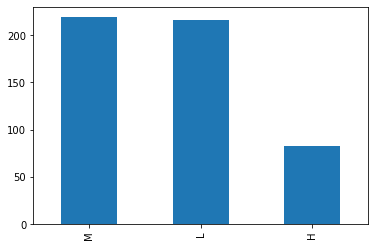

In [76]:
data_frame["Class"].value_counts().plot.bar()


# One hot encoding

In [77]:
# X and y
Without_class_data_frame = data_frame.drop(columns=['Class'])
Without_class_data_frame.head(4)

,gender,nationality,placeOfBirth,department,batch,semester,section,lastSemesterGradePoint,questionsAskInTheClassroom,questionsAskedInTheClassroom,goThroughCourseMaterials,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,parentsSatisfaction,educationStatusofParents
0,M,Bangladesh,Dhaka,SWE,16,Summer,A,3.66,M,10,L,24,3,10,5,Yes,Above HSC
1,M,Bangladesh,Munshiganj,SWE,17,Summer,B,2.25,M,8,M,118,4,30,19,Yes,Above HSC
2,M,Bangladesh,Cumilla,SWE,17,Spring,A,3.25,M,5,M,12,2,4,2,Yes,HSC
3,F,Bangladesh,Dhaka,SWE,18,Summer,B,3.50,M,2,M,11,2,3,7,No,Above HSC


In [78]:
# Get dummies
Without_class_data_frame = pd.get_dummies(Without_class_data_frame)

# data_frame head
Without_class_data_frame.head(2)

,batch,lastSemesterGradePoint,questionsAskedInTheClassroom,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,gender_F,gender_M,nationality_Bangladesh,...,questionsAskInTheClassroom_M,goThroughCourseMaterials_H,goThroughCourseMaterials_L,goThroughCourseMaterials_M,parentsSatisfaction_No,parentsSatisfaction_Yes,parentsSatisfaction_Yes,educationStatusofParents_Above HSC,educationStatusofParents_HSC,educationStatusofParents_SSC
0,16,3.66,10,24,3,10,5,0,1,1,...,1,0,1,0,0,1,0,1,0,0
1,17,2.25,8,118,4,30,19,0,1,1,...,1,0,0,1,0,1,0,1,0,0


# Label Encoding

In [79]:

Class_data_frame = data_frame.drop(columns=['gender','batch','nationality',
                                            'department','semester',
                                            'section','lastSemesterGradePoint',
                                            'questionsAskInTheClassroom',
                                            'questionsAskedInTheClassroom',
                                            'goThroughCourseMaterials',
                                            'goThroughCourseMaterial',
                                            'meetWithAcademicAdviser',
                                            'groupStudyHours',
                                            'studentAbsenceDays',
                                            'parentsSatisfaction','educationStatusofParents'])
Class_data_frame.head(3)

,placeOfBirth,Class
0,Dhaka,M
1,Munshiganj,L
2,Cumilla,L


In [80]:
Class_data_frame['Class'].unique()

array(['M', 'L', 'H'], dtype=object)

In [81]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  

# Encode labels in column 'Class'. 
Class_data_frame['Class']= label_encoder.fit_transform(Class_data_frame['Class']) 
  
Class_data_frame['Class'].unique() 


array([2, 1, 0])

In [82]:
Class_data_frame = pd.DataFrame(Class_data_frame['Class'])
Class_data_frame.head(3)

,Class
0,2
1,1
2,1


In [83]:

final_data_frame = pd.concat([Without_class_data_frame, Class_data_frame], axis = 1)
final_data_frame.head(4)

,batch,lastSemesterGradePoint,questionsAskedInTheClassroom,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,gender_F,gender_M,nationality_Bangladesh,...,goThroughCourseMaterials_H,goThroughCourseMaterials_L,goThroughCourseMaterials_M,parentsSatisfaction_No,parentsSatisfaction_Yes,parentsSatisfaction_Yes,educationStatusofParents_Above HSC,educationStatusofParents_HSC,educationStatusofParents_SSC,Class
0,16,3.66,10,24,3,10,5,0,1,1,...,0,1,0,0,1,0,1,0,0,2
1,17,2.25,8,118,4,30,19,0,1,1,...,0,0,1,0,1,0,1,0,0,1
2,17,3.25,5,12,2,4,2,0,1,1,...,0,0,1,0,1,0,0,1,0,1
3,18,3.50,2,11,2,3,7,1,0,1,...,0,0,1,1,0,0,1,0,0,1


# Co-relation Check

In [84]:
final_data_frame.corr()

,batch,lastSemesterGradePoint,questionsAskedInTheClassroom,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,gender_F,gender_M,nationality_Bangladesh,...,goThroughCourseMaterials_H,goThroughCourseMaterials_L,goThroughCourseMaterials_M,parentsSatisfaction_No,parentsSatisfaction_Yes,parentsSatisfaction_Yes,educationStatusofParents_Above HSC,educationStatusofParents_HSC,educationStatusofParents_SSC,Class
batch,1.000000,0.054141,0.092020,0.052573,-0.106342,0.013168,-0.144744,-0.023370,0.023370,0.169137,...,-0.048073,-0.006264,0.041619,0.037203,-0.033395,-0.014521,-0.019456,-0.025609,0.056574,0.007670
lastSemesterGradePoint,0.054141,1.000000,0.151437,0.072438,0.000417,0.001058,-0.031197,-0.017614,0.017614,-0.001175,...,0.173663,-0.060540,-0.088292,-0.047669,0.044179,0.012495,0.042449,-0.068720,0.021865,-0.056371
questionsAskedInTheClassroom,0.092020,0.151437,1.000000,0.256593,0.113385,0.133798,-0.019366,-0.118999,0.118999,0.071379,...,0.109463,-0.143077,0.022630,-0.048155,0.033125,0.063243,0.033457,-0.068904,0.034425,-0.121195
goThroughCourseMaterial,0.052573,0.072438,0.256593,1.000000,0.085755,0.497176,0.022326,-0.091188,0.091188,0.052621,...,0.198691,-0.149327,-0.041279,-0.143110,0.150481,-0.041016,-0.021281,-0.044878,0.081551,-0.333386
meetWithAcademicAdviser,-0.106342,0.000417,0.113385,0.085755,1.000000,0.146560,0.044956,0.033776,-0.033776,-0.063530,...,0.063355,-0.077161,0.008883,-0.080952,0.074763,0.022373,-0.043028,0.045056,0.006527,-0.011692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
parentsSatisfaction_Yes,-0.014521,0.012495,0.063243,-0.041016,0.022373,-0.057690,0.032785,-0.018347,0.018347,-0.105306,...,0.025189,-0.034715,0.006544,-0.054797,-0.173226,1.000000,-0.011718,0.047809,-0.039667,-0.063690
educationStatusofParents_Above HSC,-0.019456,0.042449,0.033457,-0.021281,-0.043028,-0.044659,0.035259,0.013646,-0.013646,0.105010,...,-0.038321,-0.044335,0.062530,0.018420,-0.015505,-0.011718,1.000000,-0.701025,-0.555301,-0.018518
educationStatusofParents_HSC,-0.025609,-0.068720,-0.068904,-0.044878,0.045056,-0.040046,0.003073,0.062824,-0.062824,-0.092514,...,0.022527,0.096883,-0.089600,0.045501,-0.055746,0.047809,-0.701025,1.000000,-0.203800,0.021156
educationStatusofParents_SSC,0.056574,0.021865,0.034425,0.081551,0.006527,0.108010,-0.051989,-0.091999,0.091999,-0.036273,...,0.026337,-0.052120,0.018648,-0.078349,0.086296,-0.039667,-0.555301,-0.203800,1.000000,0.000751


# Chi2

In [85]:
X = final_data_frame.iloc[:,:-1]
y = final_data_frame.iloc[:,-1:]   

dfcolumns =pd.DataFrame(final_data_frame.columns) 
#chi2
bestfeatures = SelectKBest(score_func=sklearn_chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)


#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Class','Chi2 Weights']
# print(featureScores.nlargest(len(data_frame.columns),'Score'))

# featureScores.plot(kind='bar', subplots=True, figsize=(20,20))
featureScores = featureScores.sort_values(by=['Chi2 Weights'], ascending=False)
display(featureScores)
display(featureScores.shape)

,Class,Chi2 Weights
3,goThroughCourseMaterial,3878.281675
6,studentAbsenceDays,685.388672
5,groupStudyHours,504.742333
2,questionsAskedInTheClassroom,468.010233
0,batch,67.140621
...,...,...
155,educationStatusofParents_Above HSC,0.092298
140,section_T,0.071091
84,placeOfBirth_Narayanganj,0.058718
9,nationality_Bangladesh,0.045347


(159, 2)

# Random Forest

In [86]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X, y)
#print("Features sorted by their score:")
#featureScores2 = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_)), reverse=True)


dfscoresOfRF = pd.DataFrame(rf.feature_importances_)
dfscoresOfRF.columns = ['Random Forest Importance']
dfscoresOfRF = dfscoresOfRF.sort_values(by='Random Forest Importance', ascending=False)



#concat two dataframes for better visualization 
featureScores = pd.concat([featureScores, dfscoresOfRF],axis=1)

#featureScores = featureScores.sort_Values(by='Score', ascending = False)
display(featureScores)
display(featureScores.shape)

<ipython-input-86-17f40633fcac>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


,Class,Chi2 Weights,Random Forest Importance
0,batch,67.140621,0.036292
1,lastSemesterGradePoint,1.500461,0.032693
2,questionsAskedInTheClassroom,468.010233,0.081867
3,goThroughCourseMaterial,3878.281675,0.249486
4,meetWithAcademicAdviser,2.258680,0.023196
...,...,...,...
154,parentsSatisfaction_Yes,3.922267,0.009010
155,educationStatusofParents_Above HSC,0.092298,0.003551
156,educationStatusofParents_HSC,1.470672,0.004342
157,educationStatusofParents_SSC,3.098894,0.001577


(159, 3)

# Training, Test Data Preparing considering top 10 features

In [87]:
feature_column_names = ['goThroughCourseMaterial','studentAbsenceDays','questionsAskedInTheClassroom','batch', 'groupStudyHours',
                        'department_ESDM', 'placeOfBirth_Feni', 'nationality_Nigeria', 'placeOfBirth_Bosasosomalia', 
                        'questionsAskInTheClassroom_H']
                        
predicted_class_name = ['Class']

# Getting feature variable values
X = final_data_frame[feature_column_names].values
y = final_data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [88]:
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [89]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

1.93% in training set
1.93% in test set


# Decision Tree

In [90]:
accuracies = {}

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train.T,y_train.T)

accu = clf.score(X_test.T,y_test.T)*100
accuracies['Decision Tree'] = accu

#Predict the response for test dataset
x_pred = clf.predict(X_train.T)

#Predict the response for test dataset
y_pred = clf.predict(X_test.T)

In [91]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train.T, x_pred))

Accuracy: 1.0


# Performance on Testing data

In [92]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.T, y_pred))

Accuracy: 0.717948717948718


# GaussianNB

In [93]:
# create GaussianNBr model object and train it with the data
from sklearn.naive_bayes import GaussianNB
nb_model= GaussianNB()
nb_model.fit(X_train.T, y_train.T.ravel())  # ravel() return 1-D array

accu = nb_model.score(X_test.T,y_test.T)*100
accuracies['Naive Bayes'] = accu

In [94]:
# performance metrics library
from sklearn import metrics

# get current accuracy of the model
prediction_from_trained_data = nb_model.predict(X_train.T)

accuracy = metrics.accuracy_score(y_train.T, prediction_from_trained_data)

print ("Accuracy of our GaussianNB model is : {0:.4f}".format(accuracy))

Accuracy of our GaussianNB model is : 0.5359


# Performance on Testing data

In [95]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test.T)

accuracy = metrics.accuracy_score(y_test.T, prediction_from_test_data)

print ("Accuracy of our GaussianNB model is: {0:0.4f}".format(accuracy))

Accuracy of our GaussianNB model is: 0.5256


In [96]:
print ("Accuracy of our GaussianNB model is: {0:0.4f} %".format(accuracy))

print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test.T, prediction_from_test_data, labels=[1, 0])))
print ("Classification Report")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test.T, prediction_from_test_data, labels=[1, 0])))

Accuracy of our GaussianNB model is: 0.5256 %
Confusion Matrix
[[62  7]
 [ 3 20]]
Classification Report
              precision    recall  f1-score   support

           1       0.54      0.87      0.67        71
           0       0.51      0.83      0.63        24

   micro avg       0.54      0.86      0.66        95
   macro avg       0.53      0.85      0.65        95
weighted avg       0.54      0.86      0.66        95



# Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train.T, y_train.T.ravel())

accu = rf_model.score(X_test.T,y_test.T)*100
accuracies['Random Forest'] = accu

In [98]:
rf_predict_train = rf_model.predict(X_train.T)

rf_accuracy = metrics.accuracy_score(y_train.T, rf_predict_train)
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 1.0000


# Performance on Testing data

In [99]:
rf_predict_test = rf_model.predict(X_test.T)

rf_accuracy_testdata = metrics.accuracy_score(y_test.T, rf_predict_test)
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.7949


In [100]:
print ("Confusion Matrix for Random Forest")
print ("{0}".format(metrics.confusion_matrix(y_test.T, rf_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test.T, rf_predict_test, labels=[1, 0])))

Confusion Matrix for Random Forest
[[64  0]
 [ 0 18]]

Classification Report

              precision    recall  f1-score   support

           1       0.81      0.90      0.85        71
           0       0.82      0.75      0.78        24

   micro avg       0.81      0.86      0.84        95
   macro avg       0.81      0.83      0.82        95
weighted avg       0.81      0.86      0.84        95



# KNN

In [101]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train.T, y_train.T.ravel())

accu = knn.score(X_test.T,y_test.T)*100
accuracies['KNN'] = accu

# predict the train response
x_pred = knn.predict(X_train.T)

# predict the test response
y_pred = knn.predict(X_test.T)

In [102]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train.T, x_pred))

Accuracy: 0.7458563535911602


# Performance on Testing data

In [103]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.T, y_pred))

Accuracy: 0.6346153846153846


In [104]:
knn_predict_test = knn.predict(X_test.T)
knn_accuracy_testdata = metrics.accuracy_score(y_test.T, knn_predict_test)
print ("Accuracy: {0:.4f}".format(knn_accuracy_testdata))
print ("Confusion Matrix for KNN Classifier")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test.T, knn_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test.T, knn_predict_test, labels=[1, 0])))

Accuracy: 0.6346
Confusion Matrix for KNN Classifier
[[45  7]
 [ 0 16]]

Classification Report

              precision    recall  f1-score   support

           1       0.74      0.63      0.68        71
           0       0.53      0.67      0.59        24

   micro avg       0.67      0.64      0.66        95
   macro avg       0.64      0.65      0.64        95
weighted avg       0.69      0.64      0.66        95



# Training, Test Data Preparing considering top 4 features

In [106]:
feature_column_names = ['goThroughCourseMaterial','studentAbsenceDays','questionsAskedInTheClassroom','batch']
                        
predicted_class_name = ['Class']

# Getting feature variable values
X = final_data_frame[feature_column_names].values
y = final_data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [107]:
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [108]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

0.77% in training set
0.77% in test set


# DT

In [109]:
accuracies = {}

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train.T,y_train.T)

accu = clf.score(X_test.T,y_test.T)*100
accuracies['Decision Tree'] = accu

#Predict the response for test dataset
x_pred = clf.predict(X_train.T)

#Predict the response for test dataset
y_pred = clf.predict(X_test.T)

In [110]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train.T, x_pred))

Accuracy: 0.9972375690607734


# Performance on Testing data

In [111]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.T, y_pred))

Accuracy: 0.7692307692307693


# GaussianNB

In [112]:
# create GaussianNBr model object and train it with the data
from sklearn.naive_bayes import GaussianNB
nb_model= GaussianNB()
nb_model.fit(X_train.T, y_train.T.ravel())  # ravel() return 1-D array

accu = nb_model.score(X_test.T,y_test.T)*100
accuracies['Naive Bayes'] = accu

In [113]:
# performance metrics library
from sklearn import metrics

# get current accuracy of the model
prediction_from_trained_data = nb_model.predict(X_train.T)

accuracy = metrics.accuracy_score(y_train.T, prediction_from_trained_data)

print ("Accuracy of our GaussianNB model is : {0:.4f}".format(accuracy))

Accuracy of our GaussianNB model is : 0.7514


# Performance on Testing data

In [114]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test.T)

accuracy = metrics.accuracy_score(y_test.T, prediction_from_test_data)

print ("Accuracy of our GaussianNB model is: {0:0.4f}".format(accuracy))

Accuracy of our GaussianNB model is: 0.7244


# RM

In [115]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train.T, y_train.T.ravel())

accu = rf_model.score(X_test.T,y_test.T)*100
accuracies['Random Forest'] = accu

In [116]:
rf_predict_train = rf_model.predict(X_train.T)

rf_accuracy = metrics.accuracy_score(y_train.T, rf_predict_train)
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9972


# Performance on Testing data

In [117]:
rf_predict_test = rf_model.predict(X_test.T)

rf_accuracy_testdata = metrics.accuracy_score(y_test.T, rf_predict_test)
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.8269


# KNN

In [118]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train.T, y_train.T.ravel())

accu = knn.score(X_test.T,y_test.T)*100
accuracies['KNN'] = accu

# predict the train response
x_pred = knn.predict(X_train.T)

# predict the test response
y_pred = knn.predict(X_test.T)

In [119]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train.T, x_pred))

Accuracy: 0.7955801104972375


# Performance on Testing data

In [120]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.T, y_pred))

Accuracy: 0.6153846153846154


# ANN

In [121]:
feature_column_names = ['goThroughCourseMaterial','studentAbsenceDays','questionsAskedInTheClassroom','batch', 'groupStudyHours','department_ESDM', 'placeOfBirth_Feni', 'nationality_Nigeria', 'placeOfBirth_Bosasosomalia', 'questionsAskInTheClassroom_H']
                        
predicted_class_name = ['Class']

# Getting feature variable values
X = final_data_frame[feature_column_names].values
y = final_data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [122]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

69.88% in training set
30.12% in test set


In [123]:
print(feature_column_names)

['goThroughCourseMaterial', 'studentAbsenceDays', 'questionsAskedInTheClassroom', 'batch', 'groupStudyHours', 'department_ESDM', 'placeOfBirth_Feni', 'nationality_Nigeria', 'placeOfBirth_Bosasosomalia', 'questionsAskInTheClassroom_H']


In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

from tensorflow.keras.metrics import categorical_crossentropy

ModuleNotFoundError: No module named 'tensorflow'

In [125]:
print(len(feature_column_names))
test_columns = len(feature_column_names)
print(test_columns)

10
10


In [126]:
acc =0
j= 0
test_columns = len(feature_column_names)
featureNo = 10

while j < test_columns:
    # Initialising the ANN
    # Initialising the ANN
  print(feature_column_names)
  classifier = Sequential()

# Adding the input layer and the first hidden layer
  classifier.add(Dense(units = 70, kernel_initializer = 'uniform', activation = 'relu', input_dim = featureNo))

# Adding the second hidden layer
  classifier.add(Dense(units = 66, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
  classifier.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
  classifier.add(Dense(units = 56, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
  classifier.add(Dense(units = 48, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
  classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
  classifier.compile(Adam(lr=.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
  classifier.fit(X_train, y_train, batch_size =42 , epochs = 2)
  
  

  # Predicting the Test set results
  predictions = classifier.predict(X_test)
  
  for p in predictions:
    print(p)

  accuracy = (predictions[0][0]+predictions[1][1])/(predictions[0][0]+predictions[0][1]+predictions[1][0]+predictions[1][1])
  acc = str(accuracy*100)
  print("Accuracy: "+ acc+"%")
    
  
  
    
  print(featureNo)
  print(feature_column_names)
  feature_column_names.pop()
  featureNo -= 1
  print(featureNo)
  X = final_data_frame[feature_column_names].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
  j += 1
  

['goThroughCourseMaterial', 'studentAbsenceDays', 'questionsAskedInTheClassroom', 'batch', 'groupStudyHours', 'department_ESDM', 'placeOfBirth_Feni', 'nationality_Nigeria', 'placeOfBirth_Bosasosomalia', 'questionsAskInTheClassroom_H']


NameError: name 'Sequential' is not defined

In [127]:
feature_column_names = ['goThroughCourseMaterial','studentAbsenceDays','questionsAskedInTheClassroom']
                        
predicted_class_name = ['Class']

# Getting feature variable values
X = final_data_frame[feature_column_names].values
y = final_data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

KeyError: "['questionsAskedInTheClassroom '] not in index"

In [128]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

69.88% in training set
30.12% in test set


In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

from tensorflow.keras.metrics import categorical_crossentropy

ModuleNotFoundError: No module named 'tensorflow'

In [130]:
  from keras.models import Sequential
    
    print(feature_column_names)
  classifier = Sequential()

# Adding the input layer and the first hidden layer
  classifier.add(Dense(units = 76, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))

# Adding the second hidden layer
  classifier.add(Dense(units = 62, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
  classifier.add(Dense(units = 56, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
  classifier.add(Dense(units = 52, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
  classifier.add(Dense(units = 46, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
  classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
  classifier.compile(Adam(lr=.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
  classifier.fit(X_train, y_train, batch_size =42 , epochs = 600)
  

  # Predicting the Test set results
  predictions = classifier.predict(X_test)
  
  for p in predictions:
    print(p)

  accuracy = (predictions[0][0]+predictions[1][1])/(predictions[0][0]+predictions[0][1]+predictions[1][0]+predictions[1][1])
  acc = str(accuracy*100)
  print("Accuracy: "+ acc+"%")

['goThroughCourseMaterial', 'studentAbsenceDays', 'questionsAskedInTheClassroom ']


NameError: name 'Sequential' is not defined

# Save trained ANN

In [ ]:
from tensorflow.keras.models import model_from_json
#serialize classifier to JSON
model_json = classifier.to_json()
with open("student_prediction_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
from tensorflow.keras.models import load_model

classifier.save('student_prediction_model.h5')  # creates a HDF5 file 'my_model.h5'
del classifier  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('student_prediction_model.h5')

# ANN using kaggle Dataset

In [ ]:
data_frame = pd.read_csv('E:\\xAPI-Edu-Data.csv')

In [ ]:
data_frame.head(2)

In [ ]:
# X and y
Without_class_data_frame = data_frame.drop(columns=['Class'])
Without_class_data_frame.head(2)

In [ ]:
# Get dummies
Without_class_data_frame = pd.get_dummies(Without_class_data_frame)

# data_frame head
Without_class_data_frame.head(3)

In [ ]:
Class_data_frame = data_frame.drop(columns=['gender','NationalITy', 'PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','raisedhands','VisITedResources','AnnouncementsView','Discussion','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays'])
Class_data_frame.head(2)

In [ ]:
Class_data_frame['Class'].unique()

In [ ]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  

# Encode labels in column 'species'. 
Class_data_frame['Class']= label_encoder.fit_transform(Class_data_frame['Class']) 
  
Class_data_frame['Class'].unique() 


In [ ]:
Class_data_frame = pd.DataFrame(Class_data_frame['Class'])
final_data_frame = pd.concat([Without_class_data_frame, Class_data_frame], axis = 1)
final_data_frame.head(2)

In [ ]:
del final_data_frame["NationalITy_Iran"]

In [ ]:
del final_data_frame["NationalITy_Iraq"]

In [ ]:
del final_data_frame["NationalITy_KW"]

In [ ]:
del final_data_frame["NationalITy_Lybia"]

In [ ]:
del final_data_frame["NationalITy_Morocco"]

In [ ]:
del final_data_frame["NationalITy_venzuela"]

In [ ]:
del final_data_frame["NationalITy_Egypt"]

In [ ]:
del final_data_frame["NationalITy_Syria"]

In [ ]:
del final_data_frame["NationalITy_Tunis"]

In [ ]:
del final_data_frame["NationalITy_lebanon"]

In [ ]:
del final_data_frame["PlaceofBirth_Iran"]

In [ ]:
del final_data_frame["PlaceofBirth_Iraq"]

In [ ]:
del final_data_frame["PlaceofBirth_KuwaIT"]

In [ ]:
del final_data_frame["PlaceofBirth_Lybia"]

In [ ]:
del final_data_frame["PlaceofBirth_Morocco"]

In [ ]:
del final_data_frame["PlaceofBirth_venzuela"]

In [ ]:
del final_data_frame["PlaceofBirth_Egypt"]

In [ ]:
del final_data_frame["PlaceofBirth_Syria"]

In [ ]:
del final_data_frame["PlaceofBirth_Tunis"]

In [ ]:
del final_data_frame["PlaceofBirth_lebanon"]

In [ ]:
X = final_data_frame.iloc[:,:-1]
y = final_data_frame.iloc[:,-1:]   

dfcolumns =pd.DataFrame(final_data_frame.columns) 
#chi2
bestfeatures = SelectKBest(score_func=sklearn_chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)


#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Chi2 Weights']
# print(featureScores.nlargest(len(data_frame.columns),'Score'))

# featureScores.plot(kind='bar', subplots=True, figsize=(20,20))
featureScores = featureScores.sort_values(by=['Chi2 Weights'], ascending=False)
display(featureScores)
display(featureScores.shape)

In [ ]:
feature_column_names = ['raisedhands','VisITedResources','AnnouncementsView']
                        
predicted_class_name = ['Class']

# Getting feature variable values
X = final_data_frame[feature_column_names].values
y = final_data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [ ]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
  print(feature_column_names)
  classifier = Sequential()

# Adding the input layer and the first hidden layer
  classifier.add(Dense(units = 76, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))

# Adding the second hidden layer
  classifier.add(Dense(units = 62, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
  classifier.add(Dense(units = 56, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
  classifier.add(Dense(units = 52, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
  classifier.add(Dense(units = 46, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
  classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
  classifier.compile(Adam(lr=.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
  classifier.fit(X_train, y_train, batch_size =42 , epochs = 600)
  

  # Predicting the Test set results
  predictions = classifier.predict(X_test)
  
  for p in predictions:
    print(p)

  accuracy = (predictions[0][0]+predictions[1][1])/(predictions[0][0]+predictions[0][1]+predictions[1][0]+predictions[1][1])
  acc = str(accuracy*100)
  print("Accuracy: "+ acc+"%")